# Creating Cohorts of Songs


Objective- As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to create a cohort of songs.

In [1]:
# Importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-1-1c2351da11d2>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


 #  EDA- Exploratory Data Analysis

In [2]:
df = pd.read_excel('rolling_stones_spotify.xlsx')

In [3]:
df


,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.shape

(1610, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   id                1610 non-null   object        
 5   uri               1610 non-null   object        
 6   acousticness      1610 non-null   float64       
 7   danceability      1610 non-null   float64       
 8   energy            1610 non-null   float64       
 9   instrumentalness  1610 non-null   float64       
 10  liveness          1610 non-null   float64       
 11  loudness          1610 non-null   float64       
 12  speechiness       1610 non-null   float64       
 13  tempo             1610 non-null   float64       
 14  valence           1610 n

In [7]:
df.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920


In [8]:
df.isnull().sum()

name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [9]:
df.columns

Index(['name', 'album', 'release_date', 'track_number', 'id', 'uri',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity',
       'duration_ms'],
      dtype='object')

In [10]:
df.dtypes

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object

In [11]:
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [42]:
df = df.select_dtypes(exclude=[object])
df.corr()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
release_date,1.000000,0.361953,-0.162174,-0.355209,0.404734,-0.062523,0.518999,0.398623,0.307471,0.031198,-0.301330,-0.082033,0.299617
track_number,0.361953,1.000000,-0.035675,-0.112004,0.096314,-0.002772,0.188351,0.100835,0.040617,-0.023934,-0.104567,-0.145115,0.156455
acousticness,-0.162174,-0.035675,1.000000,0.070017,-0.363819,0.061403,-0.117739,-0.237083,-0.021774,-0.171003,-0.138803,0.108046,0.039128
danceability,-0.355209,-0.112004,0.070017,1.000000,-0.300536,-0.031812,-0.516387,-0.249406,-0.322684,-0.324398,0.546210,0.141205,-0.220045
energy,0.404734,0.096314,-0.363819,-0.300536,1.000000,0.120261,0.511188,0.698039,0.417214,0.201885,0.046217,-0.057272,0.148876
instrumentalness,-0.062523,-0.002772,0.061403,-0.031812,0.120261,1.000000,0.008873,0.012524,0.009586,0.010961,0.103480,-0.010612,-0.137599
liveness,0.518999,0.188351,-0.117739,-0.516387,0.511188,0.008873,1.000000,0.327036,0.400018,0.108855,-0.347451,-0.205845,0.304735
loudness,0.398623,0.100835,-0.237083,-0.249406,0.698039,0.012524,0.327036,1.000000,0.189904,0.112837,-0.027571,0.156323,0.221558
speechiness,0.307471,0.040617,-0.021774,-0.322684,0.417214,0.009586,0.400018,0.189904,1.000000,0.192687,-0.399751,-0.136745,0.114546
tempo,0.031198,-0.023934,-0.171003,-0.324398,0.201885,0.010961,0.108855,0.112837,0.192687,1.000000,0.000558,-0.061061,0.001465


<Axes: >

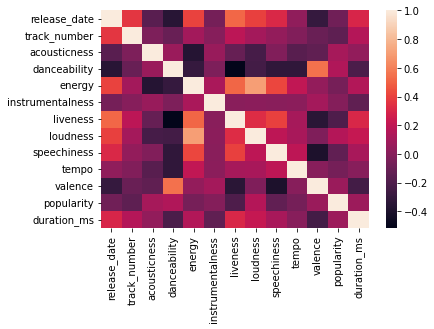

In [43]:
sns.heatmap(df.corr())

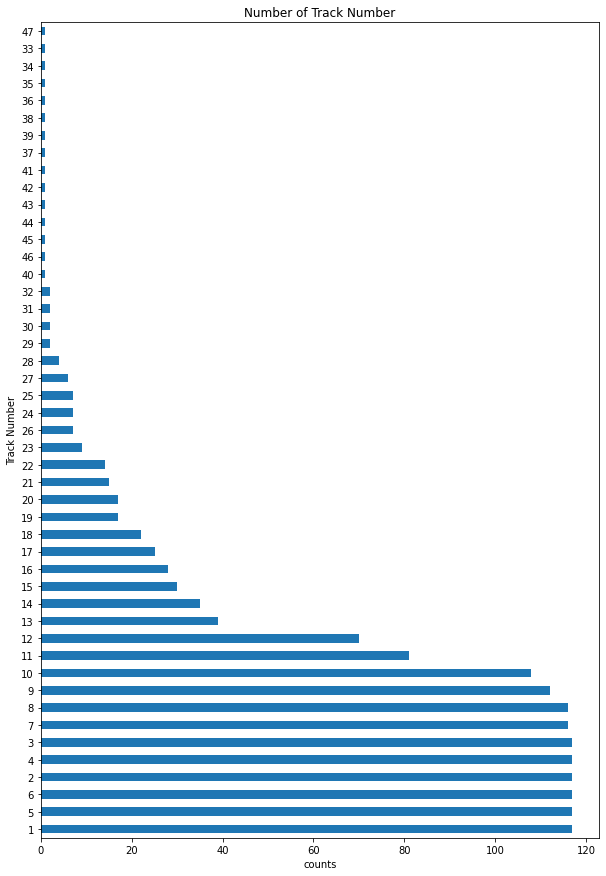

In [14]:
df['track_number'].value_counts().plot(kind='barh', figsize=(10,15))
plt.xlabel('counts')
plt.ylabel('Track Number')
plt.title('Number of Track Number')
plt.show()

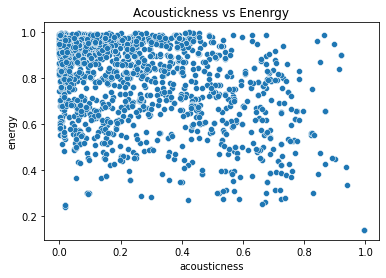

In [15]:
sns.scatterplot(x=df['acousticness'],y=df['energy'])
plt.title('Acoustickness vs Enenrgy')
plt.show()

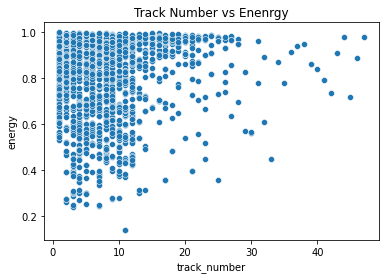

In [16]:
sns.scatterplot(x=df['track_number'],y=df['energy'])
plt.title('Track Number vs Enenrgy')
plt.show()

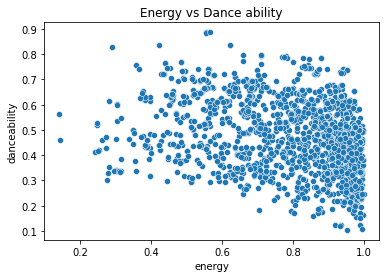

In [17]:
sns.scatterplot(x=df['energy'],y=df['danceability'])
plt.title('Energy vs Dance ability')
plt.show()

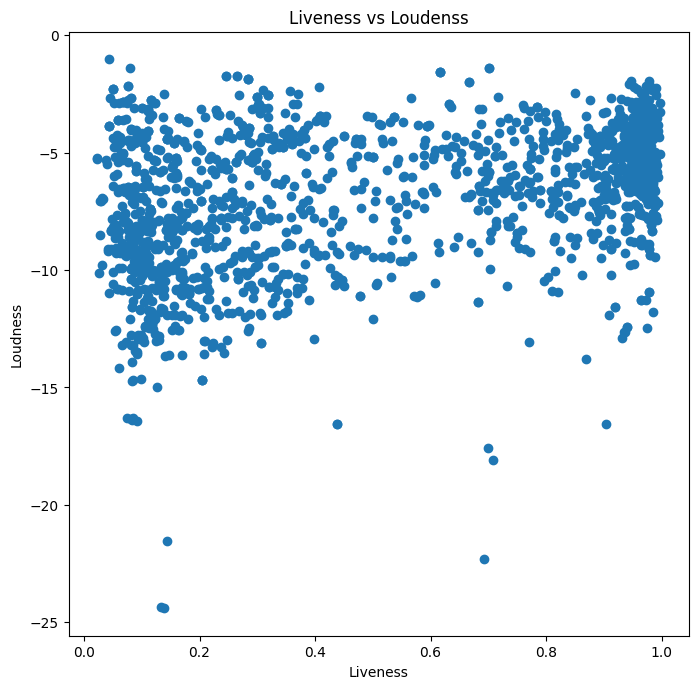

In [18]:
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(x=df['liveness'],y=df['loudness'])
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs Loudenss')
plt.show()

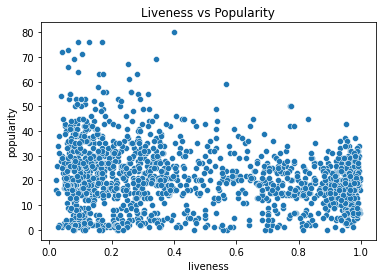

In [19]:
sns.scatterplot(x=df['liveness'],y=df['popularity'])
plt.title('Liveness vs Popularity')
plt.show()

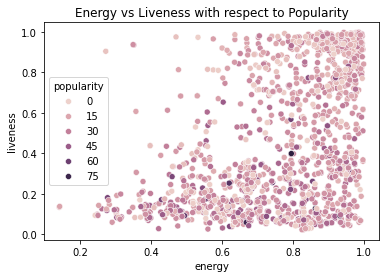

In [20]:
sns.scatterplot(x=df['energy'],y=df['liveness'],hue=df['popularity'])
plt.title('Energy vs Liveness with respect to Popularity')
plt.show()

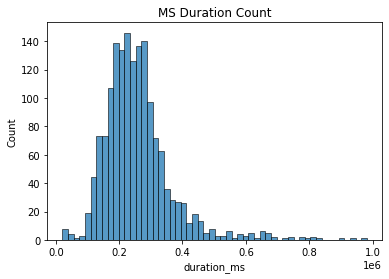

In [21]:
sns.histplot(df['duration_ms'])
plt.title('MS Duration Count')
plt.show()

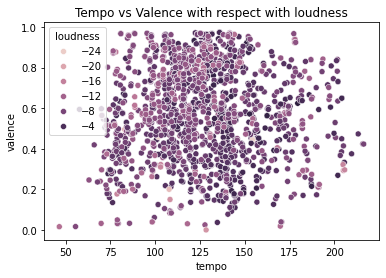

In [22]:
sns.scatterplot(x=df['tempo'],y=df['valence'],hue=df['loudness'])
plt.title('Tempo vs Valence with respect with loudness')
plt.show()

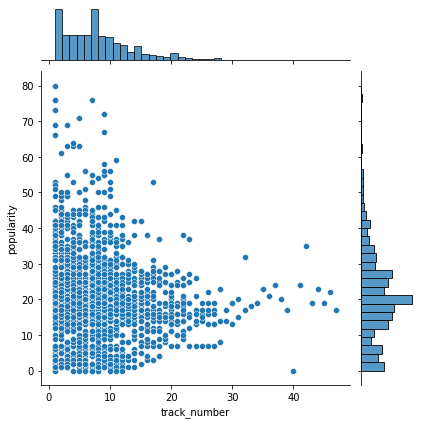

In [23]:
sns.jointplot(x=df['track_number'],y=df['popularity'])
plt.show()

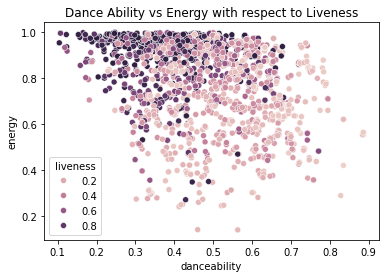

In [24]:
sns.scatterplot(x=df['danceability'],y=df['energy'],hue=df['liveness'])
plt.title('Dance Ability vs Energy with respect to Liveness')
plt.show()

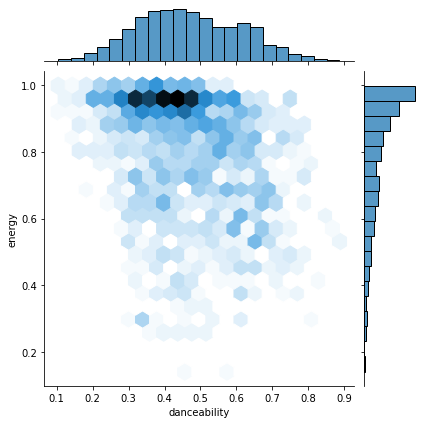

In [25]:
sns.jointplot(x=df['danceability'],y=df['energy'],kind='hex')
plt.show()

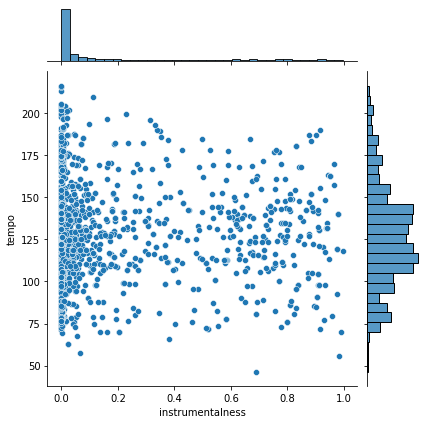

In [26]:
sns.jointplot(x=df['instrumentalness'],y=df['tempo'])
plt.show()

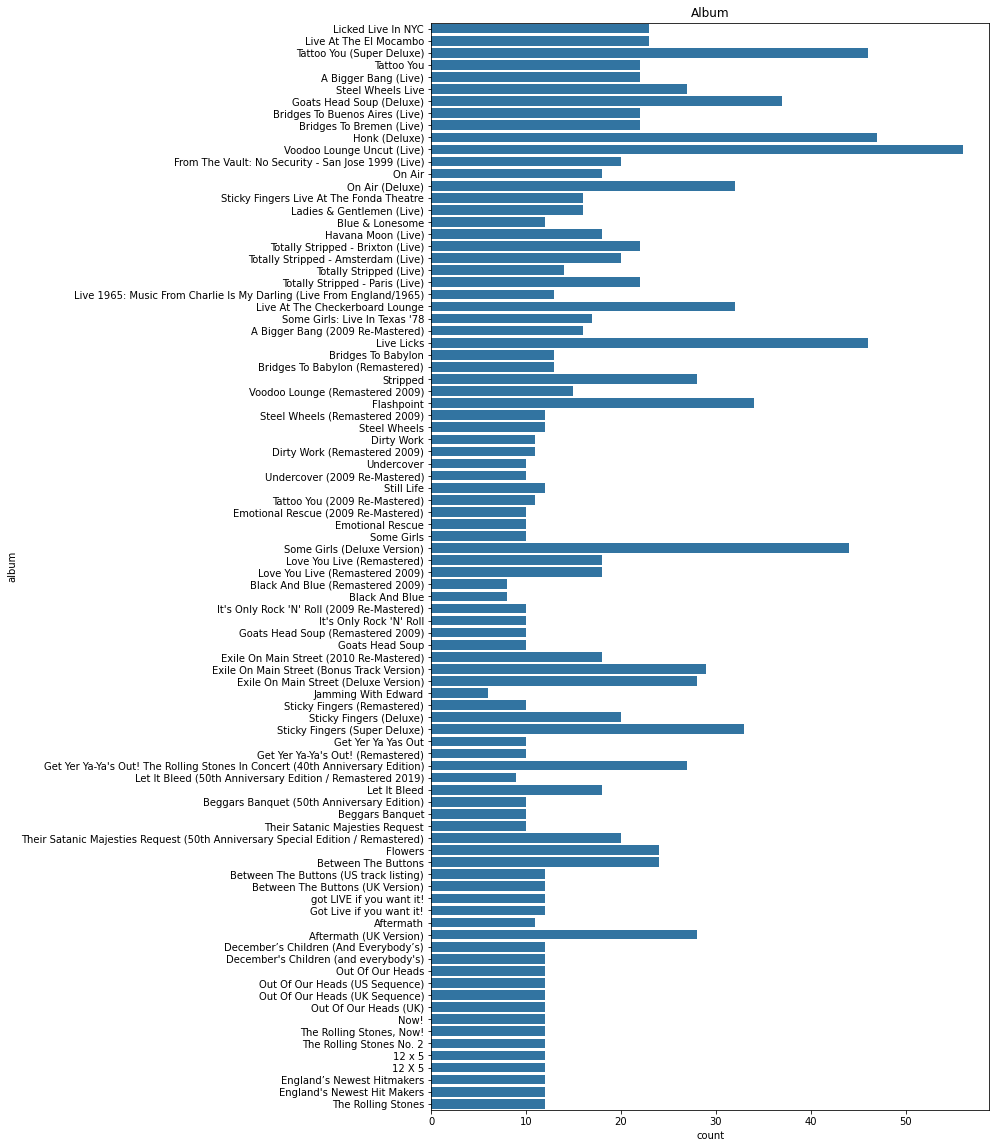

In [27]:
plt.figure(figsize=(10,20))
sns.countplot(y=df['album'])
plt.title('Album')
plt.show()

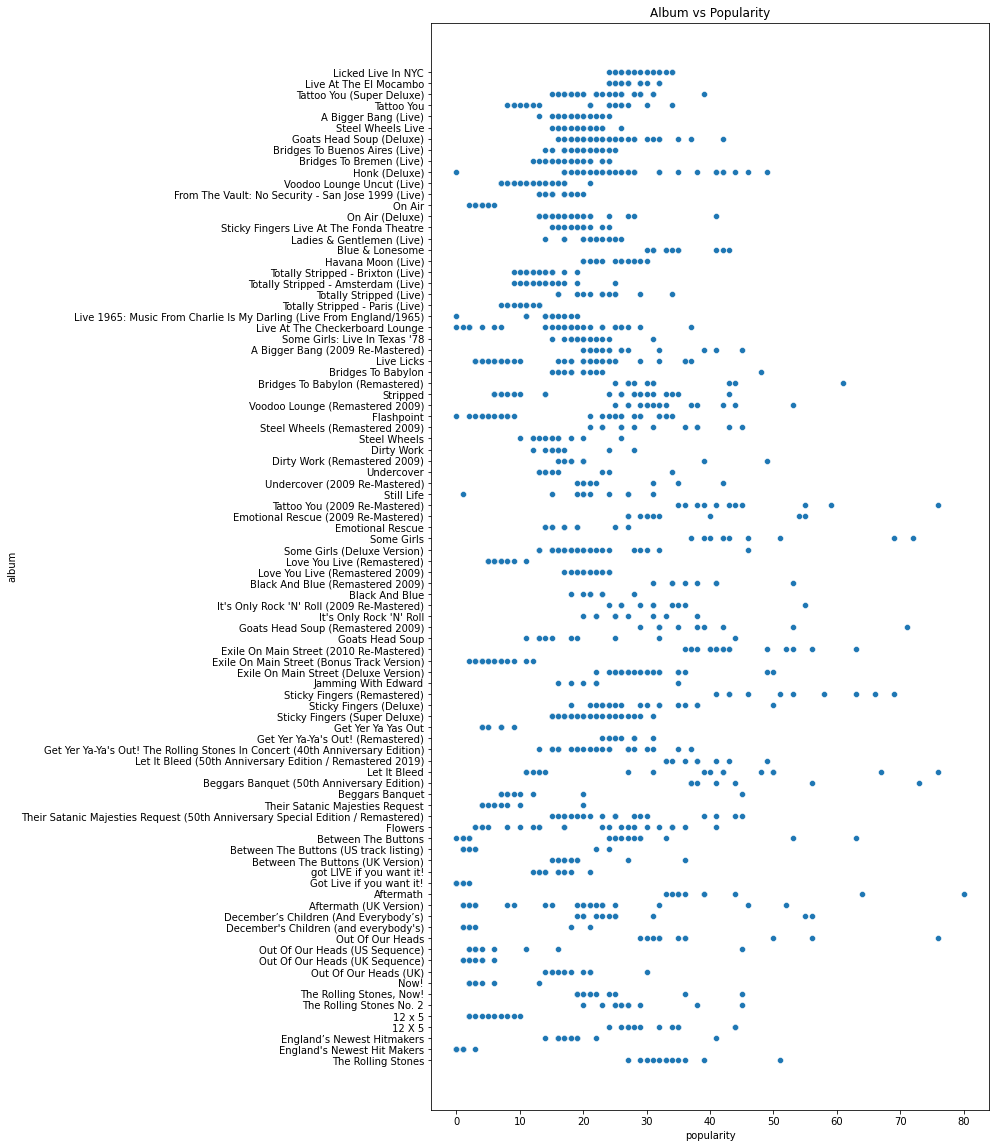

In [28]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=df['album'],x=df['popularity'])
plt.title('Album vs Popularity')
plt.show()

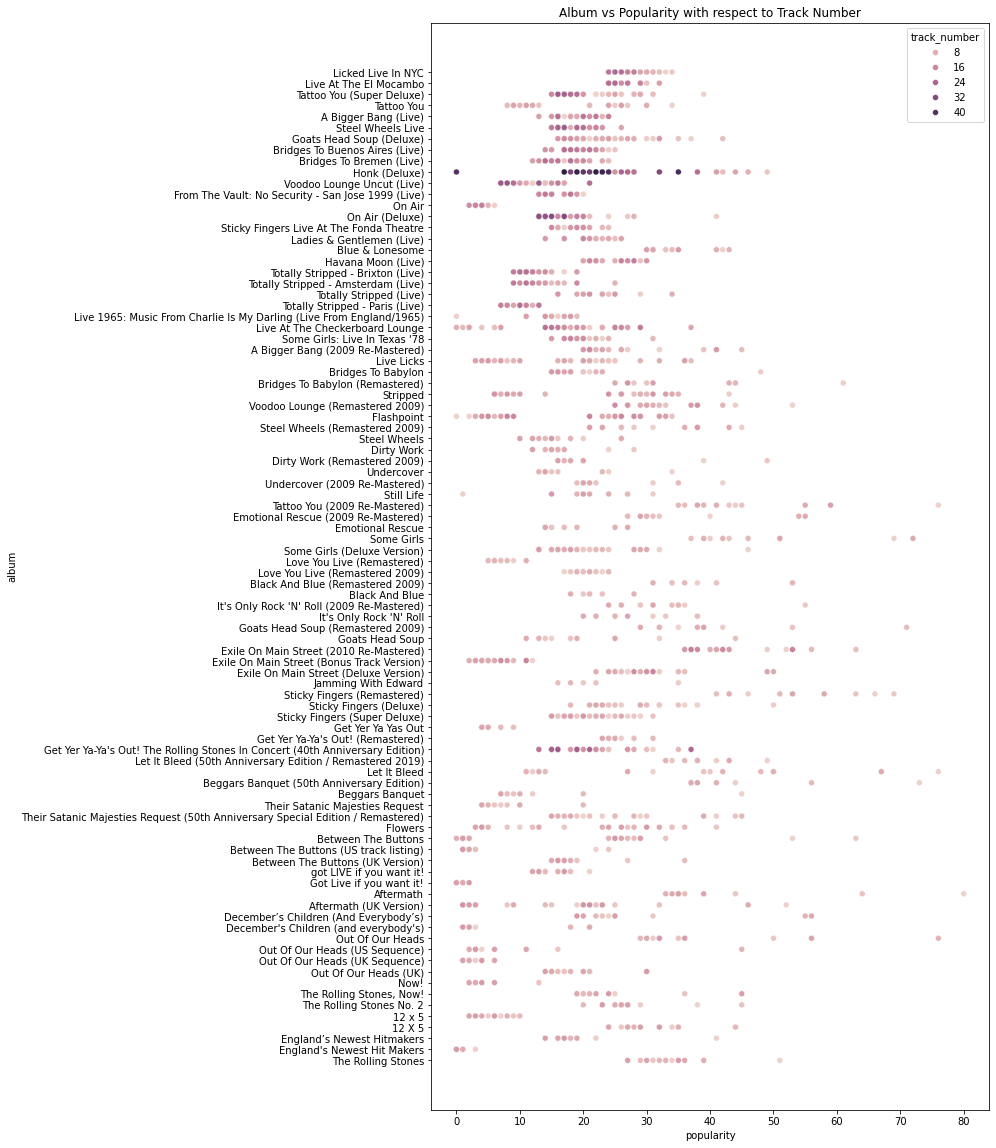

In [29]:
plt.figure(figsize=(10,20))
sns.scatterplot(y=df['album'],x=df['popularity'],hue=df['track_number'])
plt.title('Album vs Popularity with respect to Track Number')
plt.show()

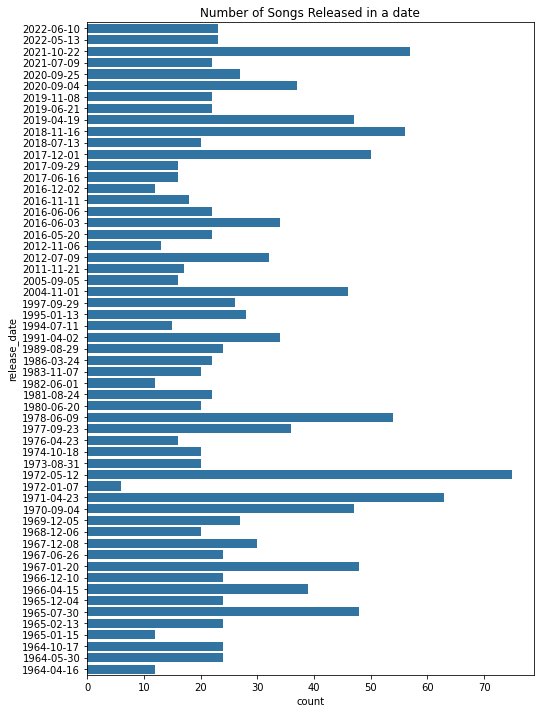

In [30]:
plt.figure(figsize=(8,12))
sns.countplot(y=df['release_date'])
plt.title('Number of Songs Released in a date')
plt.show()

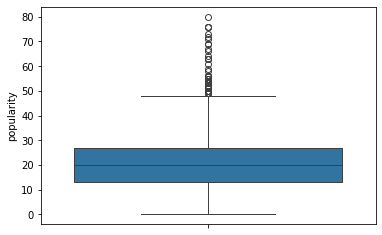

In [31]:
sns.boxplot(df['popularity'])
plt.show()

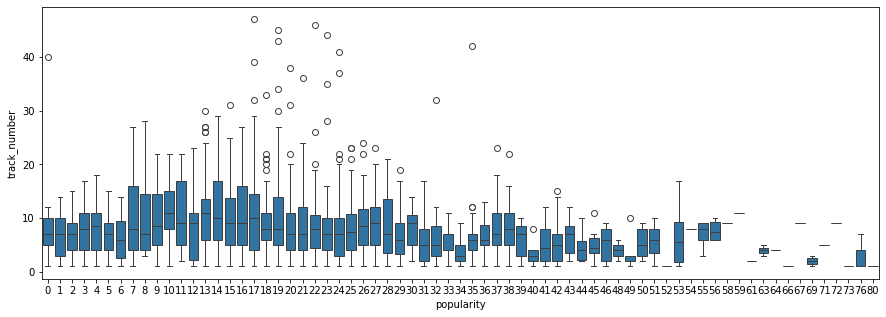

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['popularity'],y=df['track_number'])
plt.show()

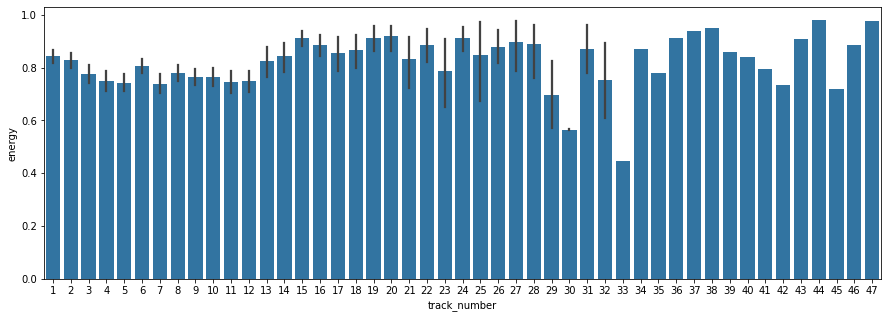

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['track_number'],y=df['energy'])
plt.show()

<Axes: ylabel='duration_ms'>

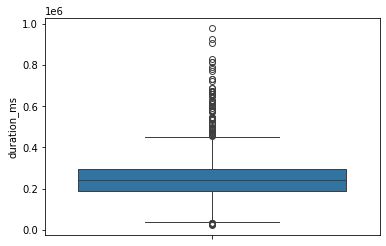

In [34]:
sns.boxplot(df['duration_ms'])

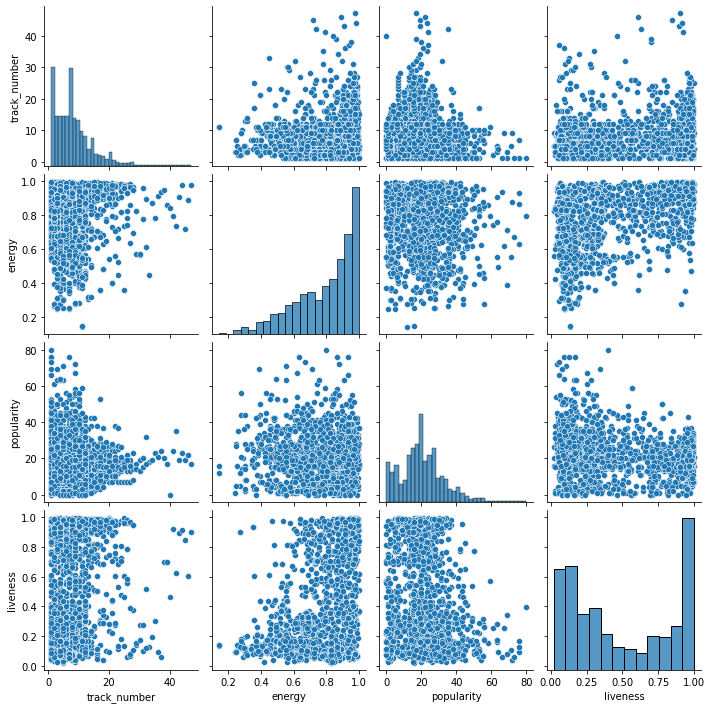

In [35]:
cols = ['track_number','energy','popularity','liveness']
sns.pairplot(df,vars=cols)
plt.show()

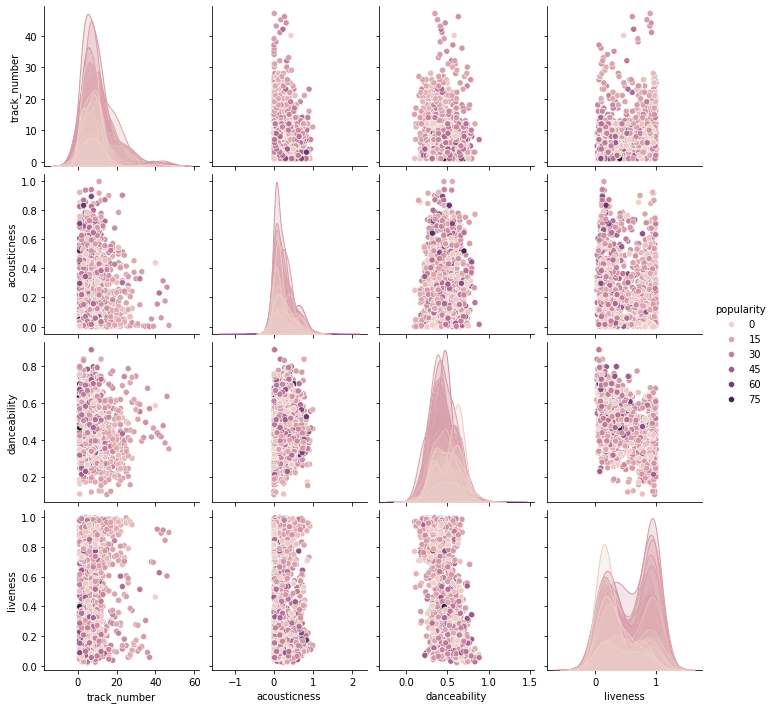

In [36]:
cols = ['track_number','acousticness','danceability','liveness']
sns.pairplot(df,vars=cols,hue='popularity')
plt.show()

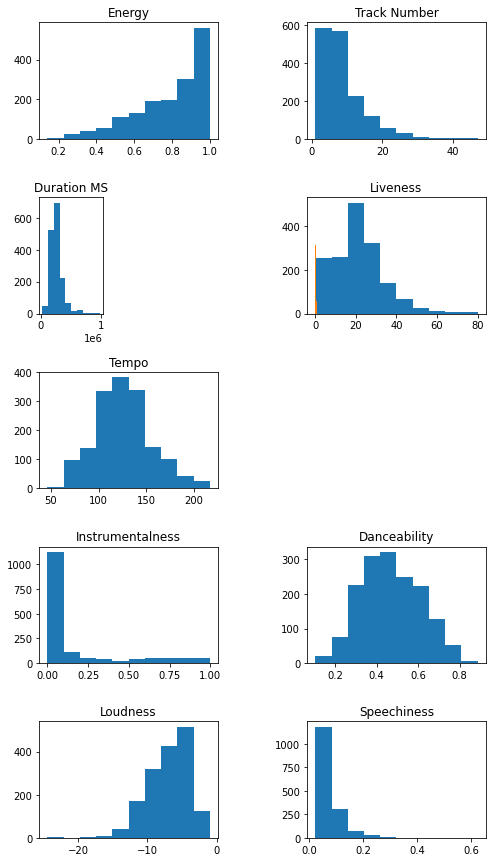

In [37]:
plt.figure(figsize=(8,15))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

plt.subplot(5,2,1)
plt.hist(df['energy'])
plt.title('Energy')

plt.subplot(5,2,2)
plt.hist(df['track_number'])
plt.title('Track Number')

plt.subplot(5,2,4)
plt.hist(df['popularity'])
plt.title('Popularity')

plt.subplot(5,2,4)
plt.hist(df['liveness'])
plt.title('Liveness')

plt.subplot(5,2,5)
plt.hist(df['tempo'])
plt.title('Tempo')

plt.subplot(5,5,6)
plt.hist(df['duration_ms'])
plt.title('Duration MS')

plt.subplot(5,2,7)
plt.hist(df['instrumentalness'])
plt.title('Instrumentalness')

plt.subplot(5,2,8)
plt.hist(df['danceability'])
plt.title('Danceability')

plt.subplot(5,2,9)
plt.hist(df['loudness'])
plt.title('Loudness')

plt.subplot(5,2,10)
plt.hist(df['speechiness'])
plt.title('Speechiness')
plt.show()

# Cluster Analysis

In [38]:
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [39]:
df.dtypes

name                        object
album                       object
release_date        datetime64[ns]
track_number                 int64
id                          object
uri                         object
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
popularity                   int64
duration_ms                  int64
dtype: object

In [40]:
X = df.drop(['name','release_date','id','uri'],axis=1)

In [41]:
X

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Licked Live In NYC,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Licked Live In NYC,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Licked Live In NYC,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,Licked Live In NYC,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Licked Live In NYC,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,The Rolling Stones,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,The Rolling Stones,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,The Rolling Stones,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,The Rolling Stones,11,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [42]:
y = df['popularity']

In [43]:
y

0       33
1       34
2       34
3       32
4       32
        ..
1605    39
1606    36
1607    30
1608    27
1609    35
Name: popularity, Length: 1610, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
X['album'] = le.fit_transform(X['album'])

In [47]:
X.head()

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,47,1,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,47,2,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,47,3,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,47,4,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,47,5,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
ms = MinMaxScaler()

In [50]:
cols = X.columns

In [51]:
X = ms.fit_transform(X)

In [52]:
X

array([[0.52808989, 0.        , 0.08288914, ..., 0.03100616, 0.4125    ,
        0.02876572],
       [0.52808989, 0.02173913, 0.43963279, ..., 0.32648871, 0.425     ,
        0.24162891],
       [0.52808989, 0.04347826, 0.41850584, ..., 0.32135524, 0.425     ,
        0.25202265],
       ...,
       [0.85393258, 0.19565217, 0.3732338 , ..., 0.85728953, 0.375     ,
        0.16139607],
       [0.85393258, 0.2173913 , 0.21830283, ..., 0.54620123, 0.3375    ,
        0.10478048],
       [0.85393258, 0.23913043, 0.38530634, ..., 0.99486653, 0.4375    ,
        0.17503585]])

In [53]:
X = pd.DataFrame(X,columns=cols)

In [54]:
X

,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0.528090,0.000000,0.082889,0.458493,0.993007,1.000000,0.932384,0.491365,0.144474,0.420994,0.031006,0.4125,0.028766
1,0.528090,0.021739,0.439633,0.283525,0.960373,0.233936,0.962094,0.838035,0.087716,0.500239,0.326489,0.4250,0.241629
2,0.528090,0.043478,0.418506,0.360153,0.965035,0.401606,0.956972,0.832350,0.152796,0.492057,0.321355,0.4250,0.252023
3,0.528090,0.065217,0.570419,0.338442,0.983683,0.000107,0.894478,0.806745,0.282623,0.509303,0.150924,0.4000,0.296483
4,0.528090,0.086957,0.402409,0.254151,0.965035,0.056124,0.967216,0.825425,0.116178,0.494808,0.211499,0.4000,0.295677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,0.853933,0.152174,0.157940,0.462324,0.921911,0.006195,0.309497,0.649483,0.032790,0.770502,0.992813,0.4875,0.138500
1606,0.853933,0.173913,0.057939,0.517241,0.658508,0.000002,0.506198,0.640378,0.101698,0.444637,0.457906,0.4500,0.233400
1607,0.853933,0.195652,0.373234,0.876117,0.737762,0.000000,0.046102,0.703044,0.081225,0.297504,0.857290,0.3750,0.161396
1608,0.853933,0.217391,0.218303,0.761175,0.472028,0.000070,0.147628,0.634393,0.064913,0.330483,0.546201,0.3375,0.104780


In [55]:
from sklearn.cluster import KMeans

In [56]:
cs = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

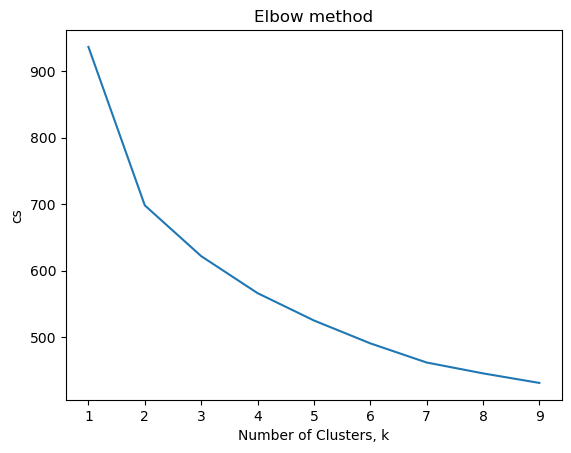

In [57]:
plt.plot(range(1,10),cs)
plt.title('Elbow method')
plt.xlabel('Number of Clusters, k')
plt.ylabel('cs')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=2,random_state=0)

In [59]:
kmeans.fit(X)

D:\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [60]:
labels = kmeans.labels_

In [61]:
correct_labels = sum(y==labels)

In [62]:
print('Results {} out of {} samples were correctly labels'.format(correct_labels,y.size))

Results 33 out of 1610 samples were correctly labels


In [63]:
print('Accuracy Score :{0:0.2f}'.format(correct_labels/float(y.size)))

Accuracy Score :0.02
